In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Downloading the same day high frequency historical data for ‘BTC’ and ‘ETH’ by using yfinance between 20th Dec 2022 and 21st Dec 2022

In [2]:
BTC = yf.download('BTC-GBP', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00+00:00,13525.039062,13525.039062,13525.039062,13525.039062,13525.039062,0
2022-12-20 00:01:00+00:00,13528.828125,13528.828125,13528.828125,13528.828125,13528.828125,0
2022-12-20 00:03:00+00:00,13540.404297,13540.404297,13540.404297,13540.404297,13540.404297,0
2022-12-20 00:04:00+00:00,13542.943359,13542.943359,13542.943359,13542.943359,13542.943359,0
2022-12-20 00:05:00+00:00,13542.881836,13542.881836,13542.881836,13542.881836,13542.881836,1983488
...,...,...,...,...,...,...
2022-12-20 23:54:00+00:00,13864.080078,13864.080078,13864.080078,13864.080078,13864.080078,0
2022-12-20 23:55:00+00:00,13866.120117,13866.120117,13866.120117,13866.120117,13866.120117,0
2022-12-20 23:56:00+00:00,13866.774414,13866.774414,13866.774414,13866.774414,13866.774414,0


In [4]:
ETH = yf.download('ETH-GBP', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00+00:00,960.600830,960.600830,960.600830,960.600830,960.600830,0
2022-12-20 00:01:00+00:00,960.971313,960.971313,960.971313,960.971313,960.971313,309248
2022-12-20 00:03:00+00:00,961.491943,961.491943,961.491943,961.491943,961.491943,0
2022-12-20 00:04:00+00:00,961.670593,961.670593,961.670593,961.670593,961.670593,0
2022-12-20 00:05:00+00:00,961.706177,961.706177,961.706177,961.706177,961.706177,311552
...,...,...,...,...,...,...
2022-12-20 23:54:00+00:00,998.807007,998.807007,998.807007,998.807007,998.807007,361472
2022-12-20 23:55:00+00:00,998.938904,998.938904,998.938904,998.938904,998.938904,651776
2022-12-20 23:56:00+00:00,998.981018,998.981018,998.981018,998.981018,998.981018,0


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [7]:
S1_0

13525.0390625

In [8]:
S2_0

960.600830078125

In [9]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1418 # Daily minute return
mu_2 = lr2.mean() * 1418
sigma_1 = lr1.std() * np.sqrt(1418) #daily volatility
sigma_2 = lr2.std() * np.sqrt(1418)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 1
T = 1
M = len(BTC)

In [10]:
rho

0.8987026809398215

In [11]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [12]:
beta

1.518788587639171

In [13]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [14]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

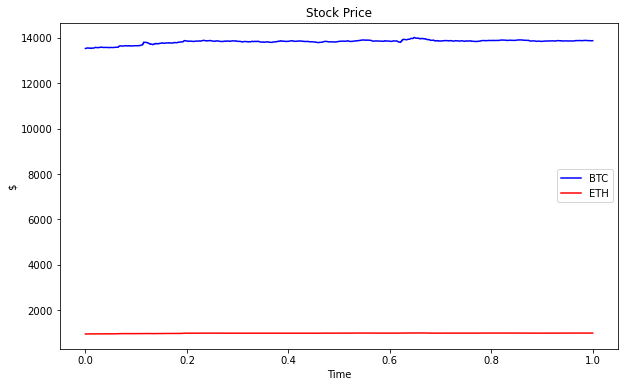

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

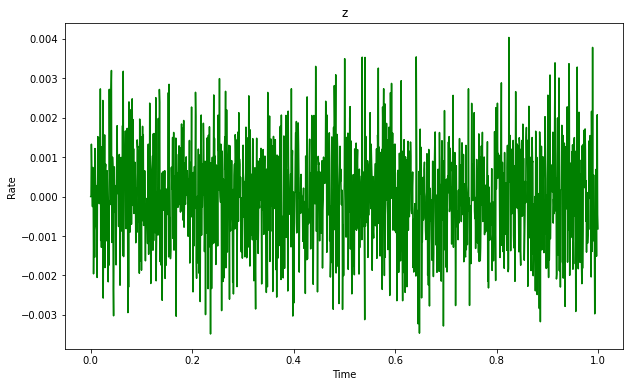

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')
#plot for co-integrated factor

In [17]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Optimal Weights

Text(0.5, 1.0, 'Weights')

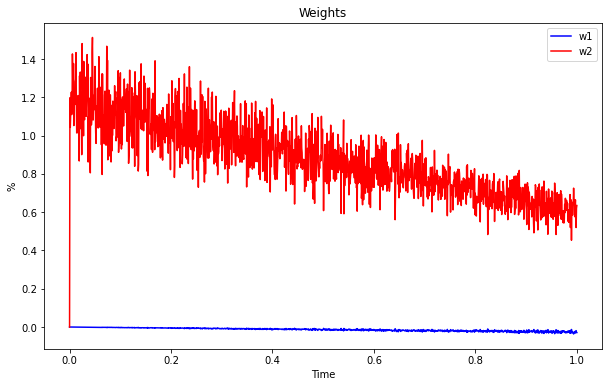

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Optimal cash Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Cash')

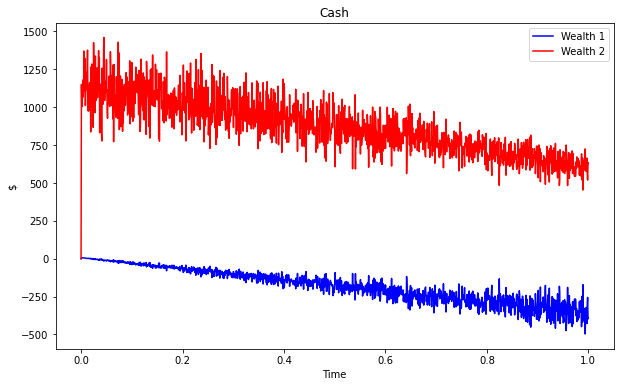

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [20]:
Pi_1.mean()

-0.012703028949544013

In [21]:
Pi_2.mean()

0.8808353830192246

Text(0.5, 1.0, 'Comparison')

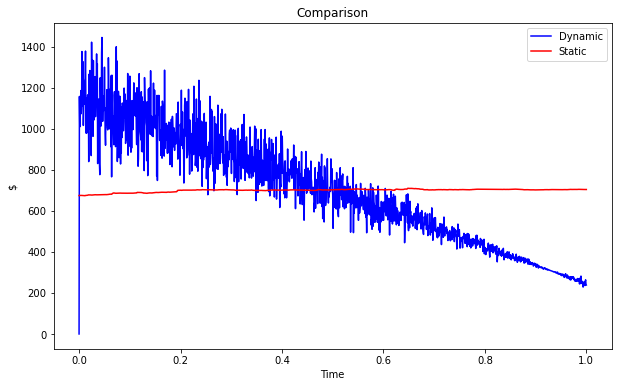

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [23]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'total')

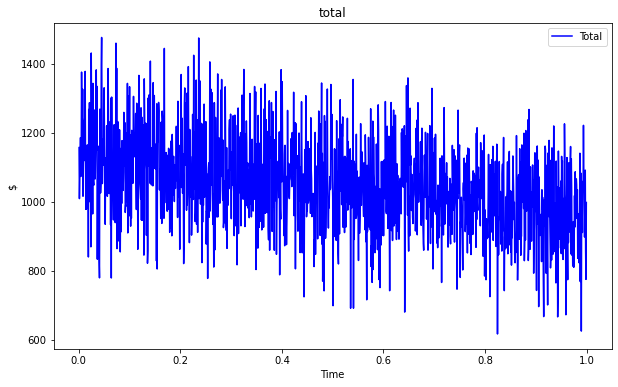

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:-1], Wealth[1:-1], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('total')

In [46]:
#daily return 
(Wealth[-1]-Wealth[1])/Wealth[1]

array([0.26800581])

Inital Wealth

In [26]:
Wealth[1]

array([1157.07884553])

Ending Wealth

In [27]:
Wealth[-1]

array([1029.72808014])

Return

In [28]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.11006231])

## Assets - Simulation and real data

In [29]:
S1_0 = BTC['Open'][0]
S2_0 = 7085

In [30]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))

mu_1 = lr1.mean() * 1418
mu_2 = 0.02
sigma_1 = lr1.std() * np.sqrt(1418)
sigma_2 = 0.1
rho = -0.7
z_0 = 0.0001
gamma = 0.5
delta = 1
T = 1
M = len(BTC)
beta = 1

In [31]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [32]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

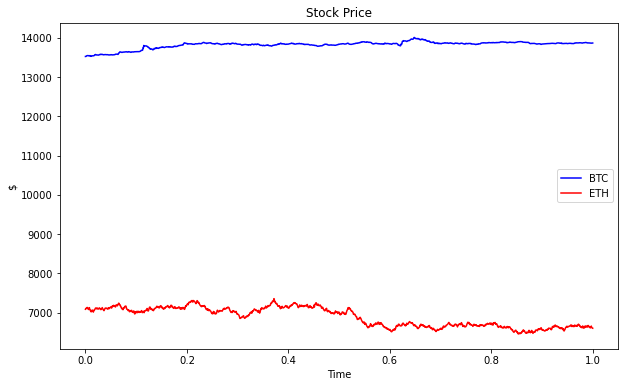

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

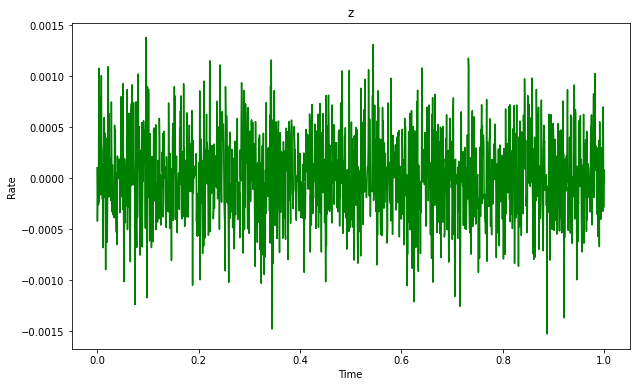

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')
#plot for co-integrated factor

### Optimal Weight

In [35]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

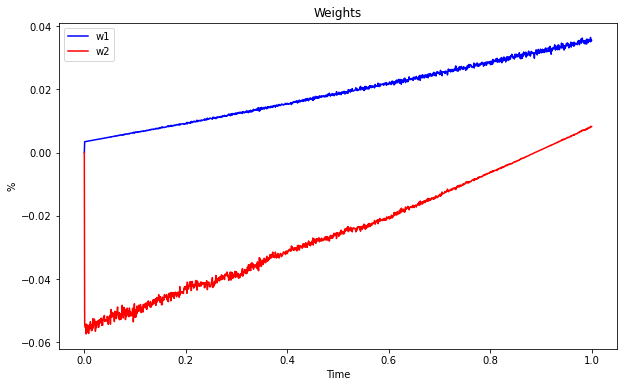

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

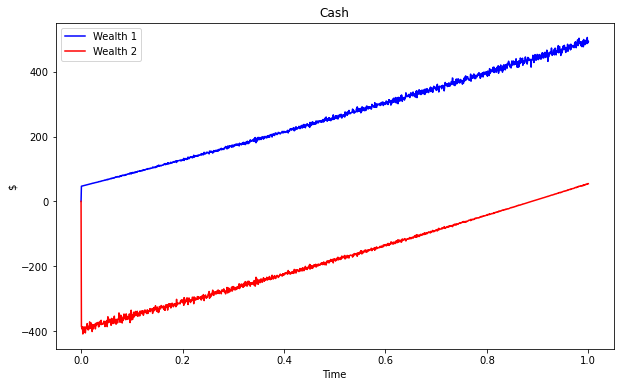

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

#Optimal cash Process - Negative means selling and you get cash

In [38]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

In [39]:
Pi_1.mean()

0.018947869270443816

In [40]:
Pi_2.mean()

-0.025092689471907514

Text(0.5, 1.0, 'Comparison')

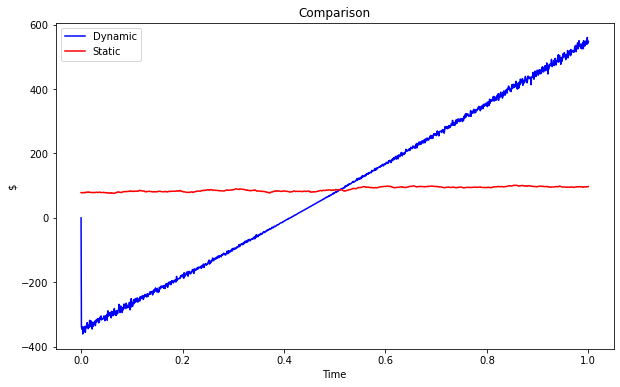

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

Text(0.5, 1.0, 'Wealth')

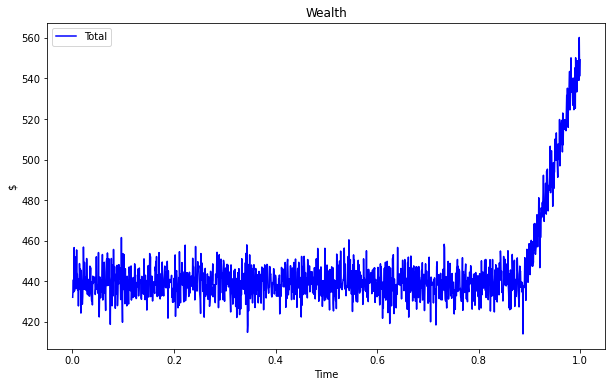

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:-1], Wealth[1:-1], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [43]:
Wealth[1]
#inital wealth

array([432.06347978])

In [44]:
Wealth[-1]
#final wealth

array([547.85900291])

In [45]:
(Wealth[-1] - Wealth[1])/Wealth[1]
#return

array([0.26800581])